In [3]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np

In [1]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/spambase.data

--2024-09-05 11:03:38--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/spambase.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702942 (686K) [text/plain]
Saving to: ‘spambase.data’

spambase.data       100%[===================>] 686.47K  --.-KB/s    in 0.04s   

2024-09-05 11:03:38 (16.2 MB/s) - ‘spambase.data’ saved [702942/702942]



### Spam Detector Using Naive Bayes & AdaBoost

In [10]:
# Note: technically multinomial NB is for "counts", but the documentation says
#       it will work for other types of "counts", like tf-idf, so it should
#       also work for our "word proportions"

data = pd.read_csv('spambase.data').values # use pandas for convenience
np.random.shuffle(data) # shuffle each row in-place, but preserve the row

X = data[:,:48]
Y = data[:,-1]

# last 100 rows will be test
Xtrain = X[:-100,]
Ytrain = Y[:-100,]
Xtest = X[-100:,]
Ytest = Y[-100:,]

model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Classification rate for NB:", model.score(Xtest, Ytest))



##### you can use ANY model! #####
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(Xtrain, Ytrain)
print("Classification rate for AdaBoost:", model.score(Xtest, Ytest))

Classification rate for NB: 0.87
Classification rate for AdaBoost: 0.9


### SMS Spam Detection

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [12]:
# data from:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset

!wget https://lazyprogrammer.me/course_files/spam.csv

--2024-09-05 14:03:45--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.03s   

2024-09-05 14:03:45 (17.5 MB/s) - ‘spam.csv’ saved [503663/503663]



In [13]:
# file contains some invalid chars
# depending on which version of pandas you have
# an error may be thrown
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [14]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [16]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# rename columns to something better
df.columns = ['labels', 'data']

In [18]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [20]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [30]:
# try multiple ways of calculating features
# tfidf = TfidfVectorizer(decode_error='ignore')
# Xtrain = tfidf.fit_transform(df_train)
# Xtest = tfidf.transform(df_test)

count_vectorizer = CountVectorizer(decode_error='ignore')
Xtrain = count_vectorizer.fit_transform(df_train)
Xtest = count_vectorizer.transform(df_test)

In [31]:
Xtrain

<3733x7022 sparse matrix of type '<class 'numpy.int64'>'
	with 49352 stored elements in Compressed Sparse Row format>

In [32]:
# create the model, train it, print scores
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.995981784087865
test score: 0.9869494290375204


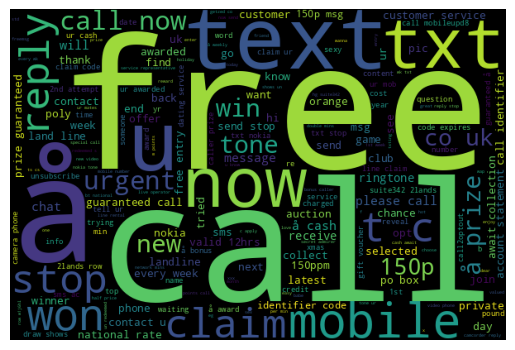

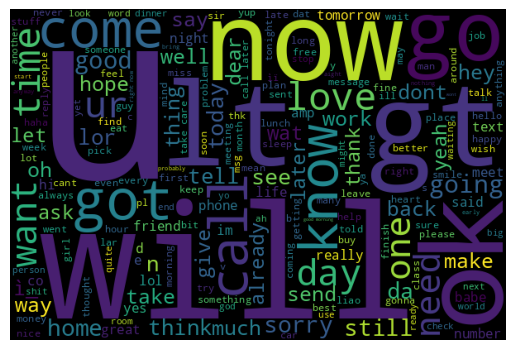

In [33]:
# visualize the data
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

visualize('spam')
visualize('ham')

In [34]:
# see what we're getting wrong
# X = tfidf.transform(df['data'])
X = count_vectorizer.transform(df['data'])
df['predictions'] = model.predict(X)

In [35]:
df.head()

,labels,data,b_labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [36]:
# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
0A$NETWORKS allow companies to bill for SMS, so they are responsible for their \suppliers\"
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
Babe: U want me dont u baby! Im nasty and have a thing 4 filthyguys. Fancy a rude time with a sexy bitch. How about we go slo n hard! Txt XXX SLO(4msgs)
This messag

In [37]:
# things that should not be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

Finally the match heading towards draw as your prediction.
26th OF JULY
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Update your face book status frequently :)
Gettin rdy to ship comp
Have you laid your airtel line to rest?
I liked the new mobile
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
